In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
#read dataset
data = pd.read_csv(r"E:\Me\data\BankCustomerData.csv")
data.head()

,ID,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,term_deposit
0,1,58,management,2,tertiary,0,2143,1,0,5,may,261,1,-1,0,0
1,2,44,technician,1,secondary,0,29,1,0,5,may,151,1,-1,0,0
2,3,33,entrepreneur,2,secondary,0,2,1,1,5,may,76,1,-1,0,0
3,4,47,blue-collar,2,unknown,0,1506,1,0,5,may,92,1,-1,0,0
4,5,33,unknown,1,unknown,0,1,0,0,5,may,198,1,-1,0,0


EDA

<AxesSubplot:xlabel='ID', ylabel='term_deposit'>

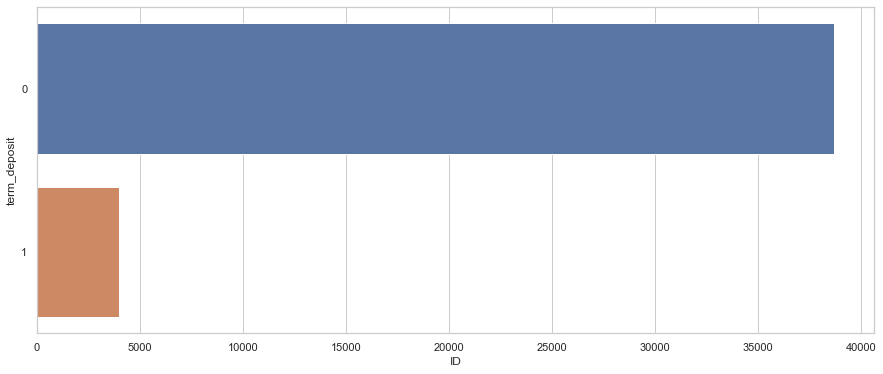

In [81]:
plt.figure(figsize=(15,6))
sns.barplot(data=data.groupby(['term_deposit'])["ID"].count().reset_index(),x='ID',y='term_deposit',orient='h')

There are much more no-subcription than subcription data. Therefore, the classes are hevily imbalance. 

Personal information

<AxesSubplot:xlabel='term_deposit', ylabel='age'>

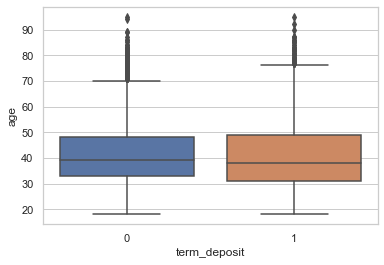

In [82]:
#Age and term_deposit
sns.boxplot(data=data,x='term_deposit',y='age')

Most customers are between 35 to 45 years old.There is little difference between age of subcription and non-subcription customers. 

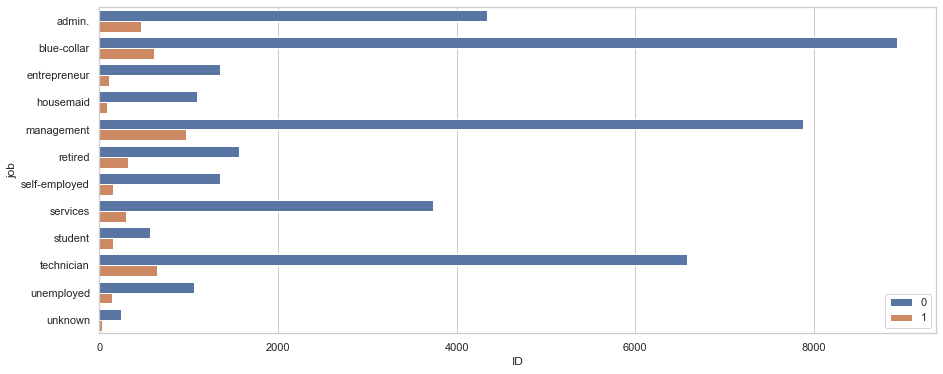

In [83]:
#Job and term_deposit
plt.figure(figsize=(15,6))
sns.barplot(data=data.groupby(['term_deposit','job'])["ID"].count().reset_index(),x='ID',y='job',hue='term_deposit',orient='h')
plt.legend(loc='lower right')

Management, technican or blue-collar seem like the type of job having high percentage of successful call. It's seem like job can be a good predictor of the outcome

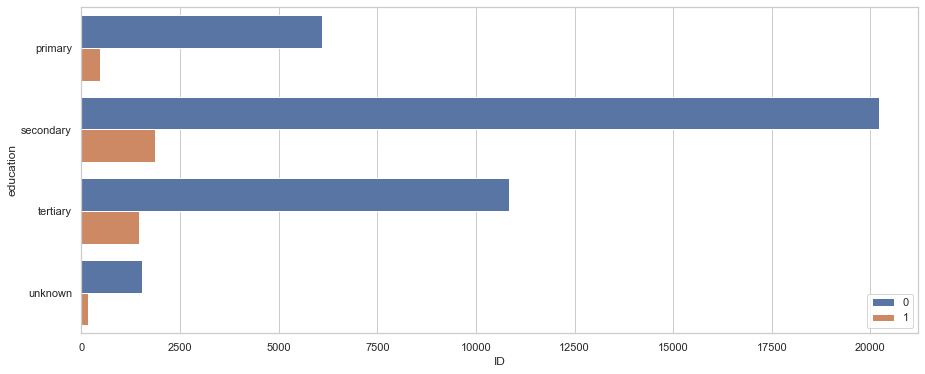

In [84]:
#Education and term_deposit
plt.figure(figsize=(15,6))
sns.barplot(data=data.groupby(['term_deposit','education'])["ID"].count().reset_index(),x='ID',y='education',hue='term_deposit',orient='h')
plt.legend(loc='lower right')

Education could be a good predictor

<AxesSubplot:xlabel='ID', ylabel='default'>

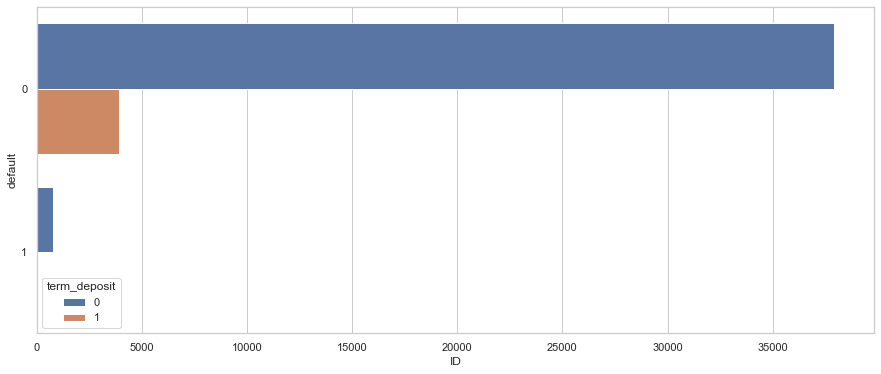

In [85]:
#Default and term_deposit
plt.figure(figsize=(15,6))
sns.barplot(data=data.groupby(['default','term_deposit'])['ID'].count().reset_index(),x='ID',y='default',hue='term_deposit',orient='h')
#plt.legend(loc='lower right')

The bank mainly focus on customers not having credit in default.It's seem like it's working.

<AxesSubplot:xlabel='term_deposit', ylabel='balance'>

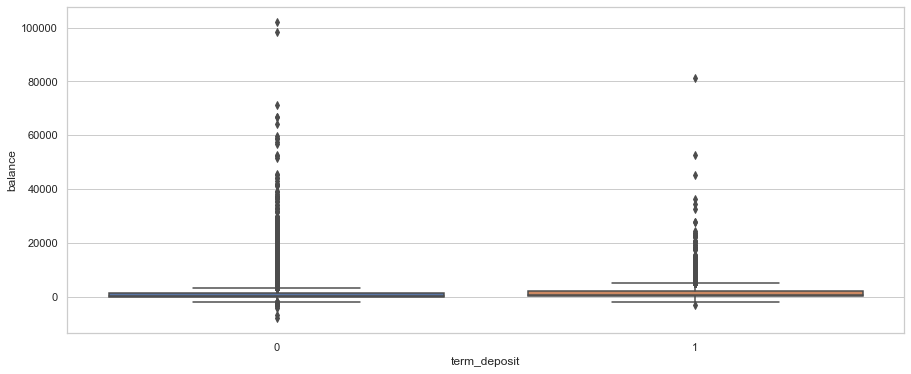

In [86]:
plt.figure(figsize=(15,6))
sns.boxplot(data=data,x='term_deposit',y='balance')

The are little difference on balance account on whether customer will deposit. However we can see that the higher the amount of balance, the less likely they will deposit

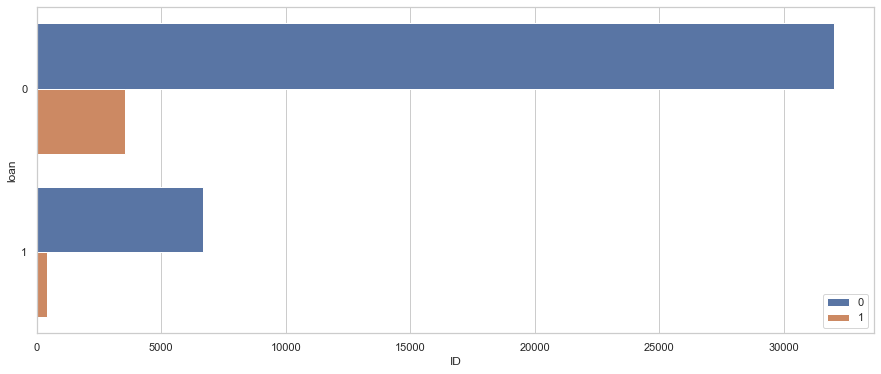

In [87]:
#Loan and term_deposit
plt.figure(figsize=(15,6))
sns.barplot(data=data.groupby(['term_deposit','loan'])["ID"].count().reset_index(),x='ID',y='loan',hue='term_deposit',orient='h')
plt.legend(loc='lower right')

The bank focus on calling customer not having any loan. However it's seem like the success rate is equal among both value. 

<AxesSubplot:xlabel='ID', ylabel='housing'>

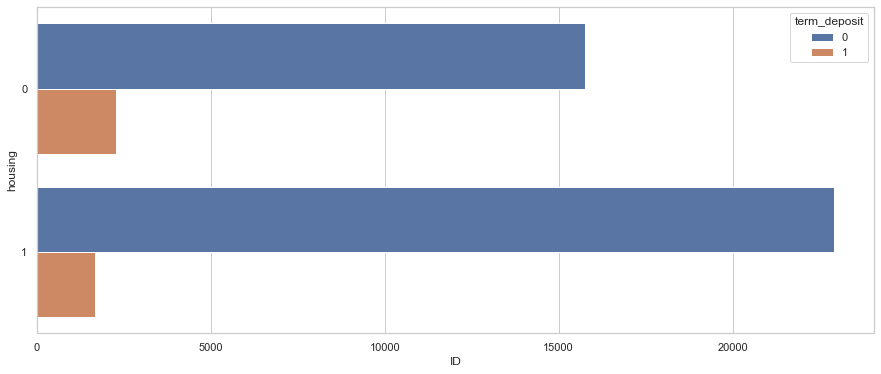

In [88]:
#Housing and term_deposit
plt.figure(figsize=(15,6))
sns.barplot(data=data.groupby(['housing','term_deposit'])['ID'].count().reset_index(),x='ID',y='housing',hue='term_deposit',orient='h')
#plt.legend(loc='lower right')

The bank mainly call customers having house. However customers not having house are more likely to deposit.

<AxesSubplot:xlabel='term_deposit', ylabel='campaign'>

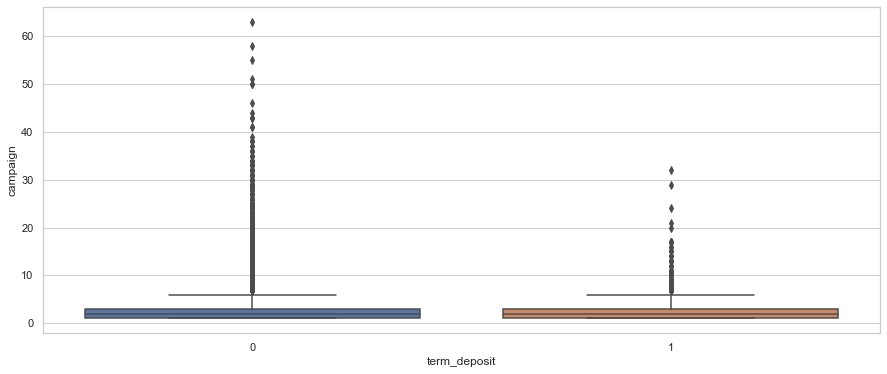

In [89]:
#Campaign and term_deposit
plt.figure(figsize=(15,6))
sns.boxplot(data=data,x='term_deposit',y='campaign')

It's seem like number of contacts performed during campaign does not predict the result. The majority of subcribed and non-subcribed number of contacts are the same and the more contacts performed, the less likely they will subcribe

<AxesSubplot:xlabel='term_deposit', ylabel='previous'>

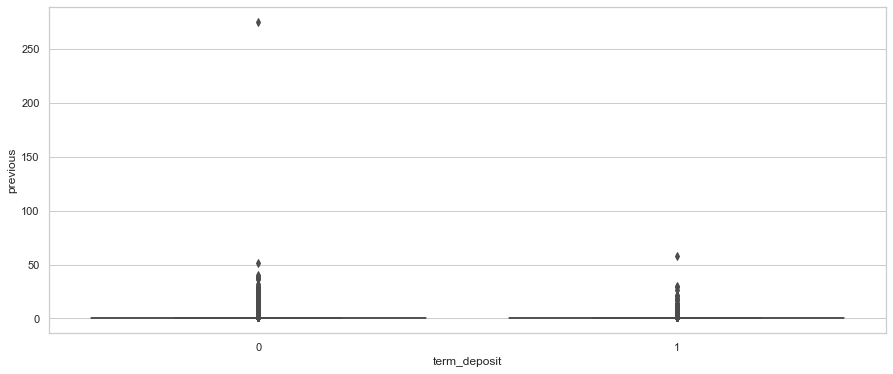

In [90]:
#Previous and term_deposit
plt.figure(figsize=(15,6))
sns.boxplot(data=data,x='term_deposit',y='previous')

Agian the are no difference between number of days that passed by after the client was last contacted in both values of term_deposit. There are an outlier in column 0

<AxesSubplot:xlabel='term_deposit', ylabel='pdays'>

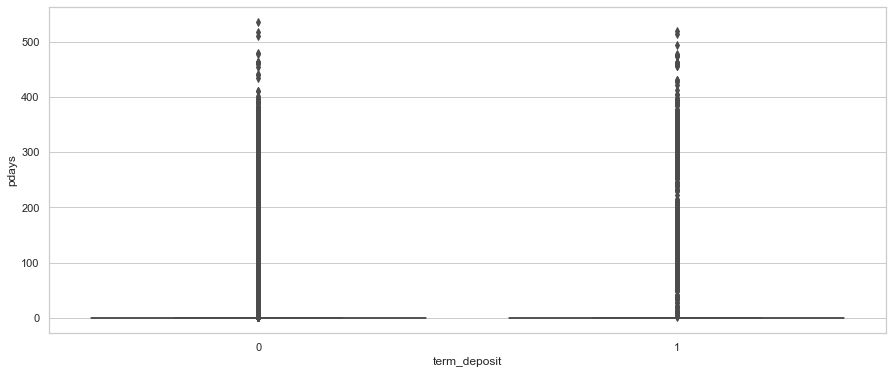

In [91]:
#Pdays and term_deposit
plt.figure(figsize=(15,6))
sns.boxplot(data=data,x='term_deposit',y='pdays')

Number of contacts performed before the campaign unlikely to influence the result

<AxesSubplot:xlabel='term_deposit', ylabel='duration'>

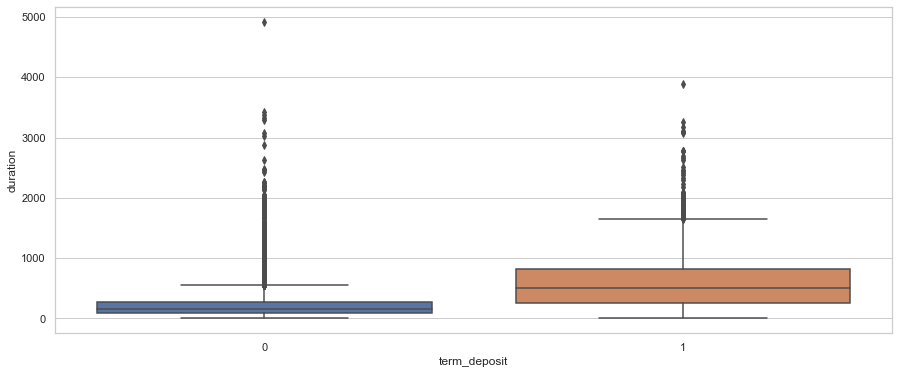

In [92]:
#Duration and term_deposit
plt.figure(figsize=(15,6))
sns.boxplot(data=data,x='term_deposit',y='duration')

Longer call usually gives better result

Machine learning

In [4]:
#Create dummy variables for categorical variables
cat_vars=['job','marital','education','default','housing','loan','month']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1
cat_vars=['job','marital','education','default','housing','loan','month']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [5]:
data_final=data[to_keep]
data_final.columns.values

array(['ID', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous', 'term_deposit', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management',
       'job_retired', 'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown', 'marital_0',
       'marital_1', 'marital_2', 'education_primary',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'default_0', 'default_1', 'housing_0', 'housing_1', 'loan_0',
       'loan_1', 'month_apr', 'month_aug', 'month_dec', 'month_feb',
       'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep'], dtype=object)

In [50]:
#Train_test_split
X = data_final.loc[:, data_final.columns != 'term_deposit']
y = data_final['term_deposit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Because there are significantly more number of non-subcription then subcription, we use SMOTE to balance the data

In [63]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
os_X, os_y = oversample.fit_resample(X_train,y_train)

In [64]:
#Check the result
print(len(os_y[os_y==0]))
print(len(os_y[os_y==1]))


27083
27083


We will use Recursive Feature Elimination (RFE) to choose the best variable to include in our model

In [53]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=20)
rfe = rfe.fit(os_X, os_y)
print(rfe.support_)
print(rfe.ranking_)

c:\Users\Admin\AppData\Local\Programs\PythonCodingPack\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Admin\AppData\Local\Programs\PythonCodingPack\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

[False False False False False False False False  True  True  True  True
  True False  True  True False  True  True False  True  True  True  True
  True  True  True False False  True  True  True  True False False False
 False False False False False False False False False]
[25 21 26 23 22 19 24 20  1  1  1  1  1  4  1  1  3  1  1  2  1  1  1  1
  1  1  1  6  5  1  1  1  1 14 10 16 13  7  8 11 18  9 12 17 15]


In [67]:
#Get the variables
from itertools import compress
cols = list(compress(os_X.columns,list(rfe.support_)))
X = os_X[cols]
y = os_y

In [68]:
#Check the p-value of variables
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.401526
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           term_deposit   No. Observations:                54166
Model:                          Logit   Df Residuals:                    54146
Method:                           MLE   Df Model:                           19
Date:                Wed, 06 Jul 2022   Pseudo R-squ.:                  0.4207
Time:                        16:23:46   Log-Likelihood:                -21749.
converged:                       True   LL-Null:                       -37545.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
job_admin.             -2.8238      0.054    -52.505      0.000      -2.929      -2.718
jo

All variables have p-value less than 0.05 so we include them all

In this projects I will use Logistic Regression Model

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [75]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.92


In [76]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[7908  218]
 [1068 7056]]


We have successfully predict 7908+7056 values and have 1068+218 incorrect predictions

In [77]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      8126
           1       0.97      0.87      0.92      8124

    accuracy                           0.92     16250
   macro avg       0.93      0.92      0.92     16250
weighted avg       0.93      0.92      0.92     16250



We get a great result: we predict on average 93% of customers intention for subcribing. 

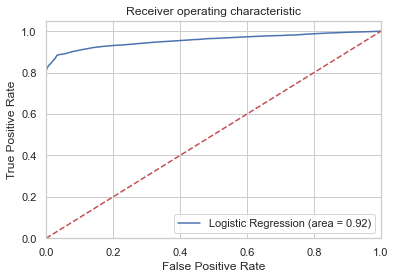

In [73]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

The receiver operating characteristic (ROC) use for evaluating model. The dot line represents pure random classifier. Our line stays very far from that line so we have a pretty good model